In [1]:
import os
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import pickle

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)

In [3]:
SIMPLE_FACTS_RESULTS="../../data/evaluations_16_results_20240620_001432_simple_facts.pkl"
FACTS_RESULTS="../../data/evaluations_15_microsoft_phi-1_5_results_20240623_003607_facts.pkl"
ORIGINAL_RESULTS="../../data/evaluations_original_microsoft_phi-1_5_results_20240623_003607_original.pkl"
RAG_RESULTS="../../data/evaluations_RAG_results_20240624_011405_RAG.pkl"

## Read results

In [4]:
with open(FACTS_RESULTS, "rb") as input_file:
    facts_results = pickle.load(input_file)

In [5]:
facts_results.keys()

dict_keys(['statements_scores', 'results_table_df', 'total_time'])

In [10]:
facts_results["results_table_df"]

,statement,round,question,mean_score,std_score
0,Abhay Bhushan Pandey is an Indian computer scientist,0,Who is Abhay Bhushan Pandey?,1.0,0.000000
1,Abhay Bhushan Pandey is an Indian computer scientist,0,What is Abhay Bhushan Pandey's nationality?,0.8,0.400000
2,Abhay Bhushan Pandey is an Indian computer scientist,0,What is Abhay Bhushan Pandey's profession?,1.4,0.489898
3,Abhay Bhushan Pandey is an Indian computer scientist,1,Who is Abhay Bhushan Pandey?,0.2,0.400000
4,Abhay Bhushan Pandey is an Indian computer scientist,1,What is Abhay Bhushan Pandey's nationality?,1.6,1.200000
5,Abhay Bhushan Pandey is an Indian computer scientist,1,What is Abhay Bhushan Pandey's profession?,1.0,0.632456
6,Abhay Bhushan Pandey is an Indian computer scientist,2,Who is Abhay Bhushan Pandey?,0.0,0.000000
7,Abhay Bhushan Pandey is an Indian computer scientist,2,What is Abhay Bhushan Pandey's nationality?,0.0,0.000000
8,Abhay Bhushan Pandey is an Indian computer scientist,2,What is Abhay Bhushan Pandey's profession?,0.0,0.000000
9,Abhay Bhushan Pandey is an Indian computer scientist,3,Who is Abhay Bhushan Pandey?,1.0,0.632456


In [30]:
ordered_questions_dfs=[]

for i, (group_name, group_df) in enumerate(facts_results["results_table_df"].groupby("statement", sort=False)):
    ordered_group_df = group_df.sort_values(["question", "round"])

    ordered_group_df["statement_id"] = i
    
    ordered_questions_dfs.append(ordered_group_df[["statement_id", "statement", "round", "question", "mean_score", "std_score"]].reset_index(drop=True))

all_questions_df = pd.concat(ordered_questions_dfs)

In [31]:
all_questions_df['max'] = all_questions_df['mean_score'] + all_questions_df['std_score']
all_questions_df['min'] = all_questions_df['mean_score'] - all_questions_df['std_score']

In [32]:
all_questions_df['question'].unique()[14]

'What degree did Abhay Bhushan Pandey receive?'

In [49]:
all_questions_df['statement']

0                                                                                             Abhay Bhushan Pandey is an Indian computer scientist
1                                                                                             Abhay Bhushan Pandey is an Indian computer scientist
2                                                                                             Abhay Bhushan Pandey is an Indian computer scientist
3                                                                                             Abhay Bhushan Pandey is an Indian computer scientist
4                                                                                             Abhay Bhushan Pandey is an Indian computer scientist
5                                                                                             Abhay Bhushan Pandey is an Indian computer scientist
6                                                                                             Abhay Bhushan Pandey is 

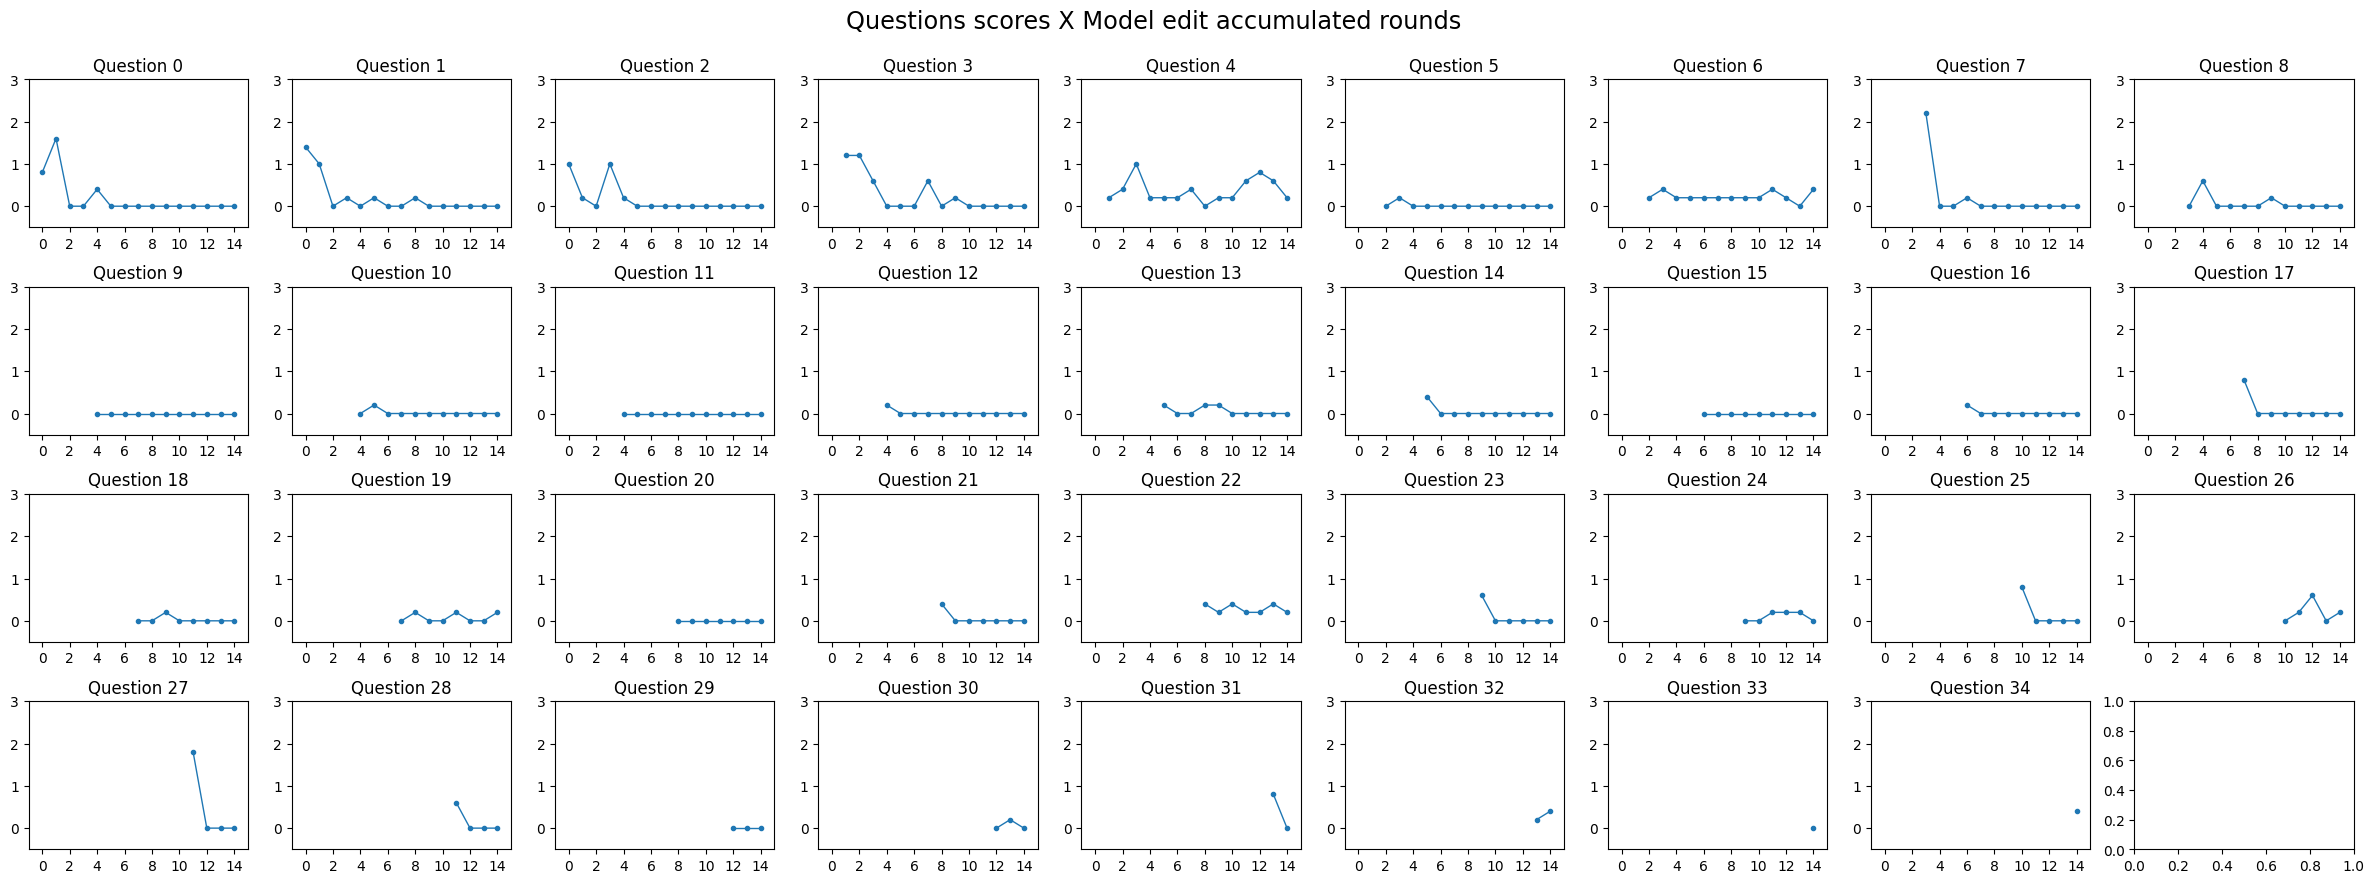

In [50]:
questions = []

fig, axs = plt.subplots(4, 9, figsize=[30, 10])

fig.suptitle("Questions scores X Model edit accumulated rounds", y=0.95, fontsize='xx-large')

for i, (group_name, group_df) in enumerate(all_questions_df.groupby(['statement_id', 'question'], sort=False)):

    questions.append({"statement_id": group_name[0],
                      "statement": group_df.iloc[0]['statement'],
                      "question_id": len(questions),
                      "question": group_name[1]})
    
    line, = axs[i // 9, i % 9].plot(group_df['round'], group_df['mean_score'], alpha=1.0, linewidth=1, marker='o', markersize=3)
    # axs[i // 9, i % 9].fill_between(group_df['round'], group_df['min'], group_df['max'], color=line.get_color(), alpha=0.1, label='Range')
    
    axs[i // 9, i % 9].set_title("Question {}".format(i))

    axs[i // 9, i % 9].set_xlim((-1, 15))
    axs[i // 9, i % 9].set_ylim((-0.5, 3.0))

    axs[i // 9, i % 9].set_xticks(range(0, 15, 2))

    # axs[i // 9, i % 9].grid()

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

In [51]:
pd.DataFrame(questions)

,statement_id,statement,question_id,question
0,0,Abhay Bhushan Pandey is an Indian computer scientist,0,What is Abhay Bhushan Pandey's nationality?
1,0,Abhay Bhushan Pandey is an Indian computer scientist,1,What is Abhay Bhushan Pandey's profession?
2,0,Abhay Bhushan Pandey is an Indian computer scientist,2,Who is Abhay Bhushan Pandey?
3,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,3,What did Abhay Bhushan Pandey make significant contributions to?
4,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,4,Who made significant contributions to the development of the Internet TCP/IP architecture?
5,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol,5,Who is the author of the File Transfer Protocol?
6,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol,6,Who wrote the File Transfer Protocol?
7,3,Abhay Bhushan Pandey is the author of early versions of email protocols,7,What is Abhay Bhushan Pandey known for?
8,3,Abhay Bhushan Pandey is the author of early versions of email protocols,8,Who is the author of early versions of email protocols?
9,4,Abhay Bhushan Pandey graduated from the first batch of Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,9,In what year did Abhay Bhushan Pandey graduate?


In [52]:
facts_results['statements_scores']

{'Abhay Bhushan Pandey is an Indian computer scientist': [{'round': 0,
   'questions': [{'question': 'Who is Abhay Bhushan Pandey?',
     'mean_score': 1.0,
     'std_score': 0.0,
     'evaluations': [{'reason': 'The candidate answer partially matches the reference answer and includes additional information not present in the reference question.',
       'score': '1',
       'generated_text': '{"reason": "The candidate answer partially matches the reference answer and includes additional information not present in the reference question.", "score": "1"}',
       'prompt_tokens': 216,
       'completion_tokens': 30,
       'total_tokens': 246,
       'total_time': 0.115550939,
       'candidate_answer': 'An Indian computer scientist who developed ways for computers to understand human language.'},
      {'reason': 'The candidate answer partially matches the reference answer information and includes extra information not present in the reference question.',
       'score': '1',
       'g

In [ ]:
results["results_table_df"]

In [ ]:
ordered = results["results_table_df"].sort_values(["question", "round"])

In [ ]:
ordered['max'] = ordered['mean_score'] + ordered['std_score']

In [ ]:
ordered['min'] = ordered['mean_score'] - ordered['std_score']

In [ ]:
q1 = ordered[ordered['question'] == 'Who is Abhay Bhushan Pandey?'][['round', 'mean_score', 'max', 'min']]

In [ ]:
q2 = ordered[ordered['question'] == "What is Abhay Bhushan Pandey's nationality?"][['round', 'mean_score', 'max', 'min']]

In [ ]:
q3 = ordered[ordered['question'] == "What is Abhay Bhushan Pandey's profession?"][['round', 'mean_score', 'max', 'min']]

In [ ]:
ordered[['round', 'mean_score', 'max', 'min']]

In [ ]:
ordered['question'].unique().shape

In [ ]:
ordered['question'].unique()[22]

In [ ]:
results["results_table_df"][results["results_table_df"]['question'] == ordered['question'].unique()[22]]